# AND,OR using neural network


In [3]:
import numpy as np
class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights is None:
            self.weights = np.ones(input_length) * 0.5
        else:
            self.weights = weights
        
    @staticmethod
    def unit_step_function(x):
        if x > 0.5:
            return 1
        return 0
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
p = Perceptron(2, np.array([0.5, 0.5]))

for x in [np.array([0, 0]), np.array([0, 1]), 
          np.array([1, 0]), np.array([1, 1])]:
    y = p(np.array(x))
    print(x, y)

(array([0, 0]), 0)
(array([0, 1]), 0)
(array([1, 0]), 0)
(array([1, 1]), 1)


## Line Boundary

In [4]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights==None:
            self.weights = np.random.random((input_length)) * 2 - 1
        self.learning_rate = 0.1
        
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i] *self.learning_rate
            self.weights[i] += correction 

     
def above_line(point, line_func):
    x, y = point
    if y > line_func(x):
        return 1
    else:
        return 0
  
points = np.random.randint(1, 100, (100, 2))
p = Perceptron(2)

def lin1(x):
    return  x + 4

for point in points:
    p.adjust(above_line(point, lin1), 
             p(point), 
             point)

evaluation = Counter()
for point in points:
    if p(point) == above_line(point, lin1):
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())

[('correct', 90), ('wrong', 10)]


0.953083739436


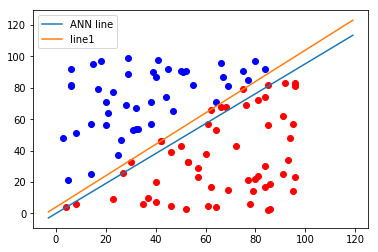

In [5]:
%matplotlib inline 

from matplotlib import pyplot as plt

cls = [[], []]
for point in points:
    cls[above_line(point, lin1)].append(tuple(point))


colours = ("r", "b")
for i in range(2):
    X, Y = zip(*cls[i])
    plt.scatter(X, Y, c=colours[i])
    
X = np.arange(-3, 120)
    
m = -p.weights[0] / p.weights[1]
print(m)
plt.plot(X, m*X, label="ANN line")
plt.plot(X, lin1(X), label="line1")
plt.legend()
plt.show()

## XOR with Neural Network


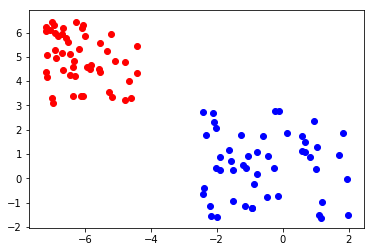

In [6]:
import numpy as np
from matplotlib import pyplot as plt

npoints = 50
X, Y = [], []
# class 0
X.append(np.random.uniform(low=-2.5, high=2.3, size=(npoints,)) )
Y.append(np.random.uniform(low=-1.7, high=2.8, size=(npoints,)))

# class 1
X.append(np.random.uniform(low=-7.2, high=-4.4, size=(npoints,)) )
Y.append(np.random.uniform(low=3, high=6.5, size=(npoints,)))

learnset = []
for i in range(2):
    # adding points of class i to learnset
    points = zip(X[i], Y[i])
    for p in points:
        learnset.append((p, i))

colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])

##  Working with dataset which is linearly inseperable

[('correct', 62), ('wrong', 38)]
0.908715982677


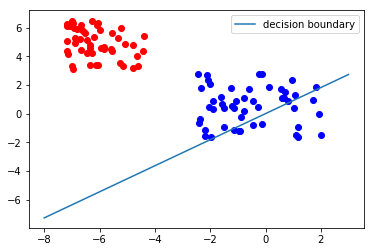

In [7]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights==None:
            self.weights = np.random.random((input_length)) * 2 - 1
        self.learning_rate = 0.1
        
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i] *self.learning_rate
            self.weights[i] += correction 

     
  
p = Perceptron(2)


for point, label in learnset:
    p.adjust(label, 
             p(point), 
             point)

evaluation = Counter()
for point, label in learnset:
    if p(point) == label:
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())


colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])

XR = np.arange(-8, 4)  
m = -p.weights[0] / p.weights[1]
print(m)
plt.plot(XR, m*XR, label="decision boundary")
plt.legend()
plt.show()

## bias nodes to solve linearly inseperable problem:

[('correct', 78), ('wrong', 22)]
(1.3631499312394095, 1.7900611908469932)


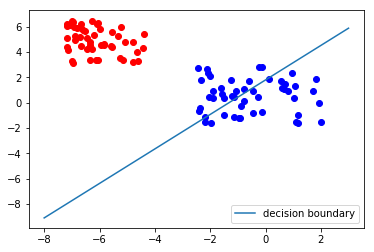

In [8]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights==None:
            # input_length + 1 because bias needs a weight as well
            self.weights = np.random.random((input_length + 1)) * 2 - 1
        self.learning_rate = 0.05
        self.bias = 1
    
    @staticmethod
    def sigmoid_function(x):
        res = 1 / (1 + np.power(np.e, -x))
        return 0 if res < 0.5 else 1
        
    def __call__(self, in_data):
        weighted_input = self.weights[:-1] * in_data
        weighted_sum = weighted_input.sum() + self.bias *self.weights[-1]
        return Perceptron.sigmoid_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i]  *self.learning_rate
            #print("weights: ", self.weights)
            #print(target_result, calculated_result, in_data, error, correction)
            self.weights[i] += correction 
        # correct the bias:
        correction = error * self.bias * self.learning_rate
        self.weights[-1] += correction 
     
  
p = Perceptron(2)

for point, label in learnset:
    p.adjust(label, 
             p(point), 
             point)

evaluation = Counter()
for point, label in learnset:
    if p(point) == label:
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())


colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])

XR = np.arange(-8, 4)  
m = -p.weights[0] / p.weights[1]

b = -p.weights[-1]/p.weights[1]
print(m, b)
plt.plot(XR, m*XR + b, label="decision boundary")
plt.legend()
plt.show()